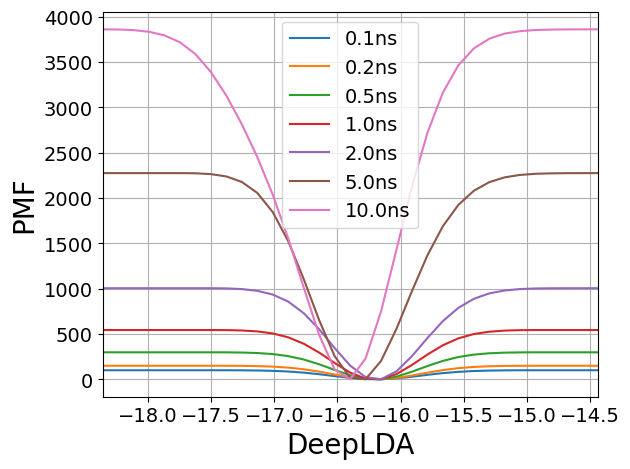

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

def marginalize(free):    
    # Filter data based on conditions
    free = free.reshape(51,51)
    
    # Calculate free energies
    free = -2.49 * np.logaddexp.reduce(-1 / 2.49 * free, 0)
    return free
    
def plot(method, date):
    base_dir = f'/home/guest_sky/geodesic-interpolation-cv/simulations/aldp/{method}/log/{date}/0/fes'
    # Iterate through all subdirectories
    for t in [1,2,5,10,20,50,100]:
        file = os.path.join(base_dir, f"{t}.dat")
    
        # Load data from the file
        data = np.loadtxt(file, comments='#')
        
        with open(file, 'r') as file:
            first_line = file.readline().strip()
            
        keys = first_line.split()[2:]
        cv_idx = keys.index(cv_name[method])
        free_idx = keys.index('file.free')
        cv = data[:, cv_idx]
        free = data[:, free_idx]
        if method == 'ref':
            free = marginalize(free)
            cv = np.arange(-np.pi, np.pi, 2*np.pi/51)

        pmf = free - free.min()
        plt.plot(cv, pmf, label=f'{t*0.1}ns')

    plt.xlabel(method, fontsize=20, fontweight="medium")
    plt.ylabel('PMF', fontsize=20, fontweight="medium")
    plt.legend(fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(cv.min(), cv.max())
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'../figures/time_pmf_{method}.png', dpi=300, bbox_inches="tight")
    plt.savefig(f'../figures/time_pmf_{method}.pdf', dpi=300, bbox_inches="tight")
    plt.show()

cv_name = {
    'phi': 'phi',
    'ref': 'phi',
    'CL': 'deep.node-2',
    'DeepTDA': 'deep.node-0',
    'DeepLDA': 'deep.node-0',
    'DeepTICA': 'deep.node-0',
}
# method = 'phi'
# date = '0120114455'
# method = 'ref'
# date = '0120114606'
# method = 'CL'
# date = '0120120020'
# method = 'DeepTDA'
# date = '0120120139'
method = 'DeepLDA'
date = '0121033441'
plot(method, date)